# Sesión 2

In [1]:
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')
#Paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabr
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# Librerias
import pandas as pd
import numpy as np
import sys
import nltk

!{sys.executable} -m pip install pandas-profiling
!pip install vaderSentiment
!pip install seaborn
!pip install imbalanced-learn
!pip install nltk
!pip install scipy
from imblearn.pipeline import Pipeline as ImbPipeline
import nltk
nltk.data.path.append("C:/Users/Felipe Jaimes/nltk_data")
nltk.download('punkt', force=True)
import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.model_selection import cross_val_score
from scipy import stats as st

from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1. Perfilamiento, entendimiento de los datos y  análisis de la calidad de los datos

Carga de datos

In [3]:
data_cargada=pd.read_csv('Data/fake_news_spanish.csv', sep=';', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data=data_cargada

In [4]:
data.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
3,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
4,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
5,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
6,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
7,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
8,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021
9,ID,1,Aragón cede y permitirá anunciar casas de apue...,La comunidad cierra un acuerdo con el Gobierno...,20/09/2019


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57062 entries, 0 to 57061
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57062 non-null  object
 1   Label        57062 non-null  int64 
 2   Titulo       57046 non-null  object
 3   Descripcion  57062 non-null  object
 4   Fecha        57062 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [6]:
data.shape

(57062, 5)

#### Inicializacion de variables

In [7]:
p = inflect.engine()
nltk.download('stopwords')
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcosrodrigo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Entendimiento de los datos

In [8]:

textos_analisis = data.copy()
textos_analisis['Conteo_Titulo'] = [len(str(x)) for x in textos_analisis['Titulo']]
textos_analisis['Conteo_Descripcion'] = [len(str(x)) for x in textos_analisis['Descripcion']]

textos_analisis['Max_Titulo'] = [[max([len(str(x)) for x in str(i).split(' ')])][0] for i in textos_analisis['Titulo']]
textos_analisis['Max_Titulo'] = [[max([len(str(x)) for x in str(i).split(' ')])][0] for i in textos_analisis['Titulo']]
textos_analisis['Min_Descripcion'] = [[min([len(str(x)) for x in str(i).split(' ')])][0] for i in textos_analisis['Descripcion']]
textos_analisis['Min_Descripcion'] = [[min([len(str(x)) for x in str(i).split(' ')])][0] for i in textos_analisis['Descripcion']]

textos_analisis  

,ID,Label,Titulo,Descripcion,Fecha,Conteo_Titulo,Conteo_Descripcion,Max_Titulo,Min_Descripcion
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,77,218,9,1
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,104,3515,10,1
2,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,110,133,12,2
3,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,72,242,11,1
4,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019,86,209,12,1
...,...,...,...,...,...,...,...,...,...
57057,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,116,244,9,1
57058,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,100,314,11,1
57059,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,90,70,14,2
57060,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,118,232,16,1


2. Preparación de los datos

Limpieza de datos y toquenización 

In [9]:
data.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

Ya que hay datos que no se encuentran en tipo String los convertirimos a String y la Fecha tambien

In [10]:
data['Titulo'] = data['Titulo'].astype('string')
data['Descripcion'] = data['Descripcion'].astype('string')

data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')
df=data

Vamos a buscar los datos Nulos


In [11]:
df.isnull().sum()

ID              0
Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64

Revisemos que pasa en la columna titulo ya que es la unica fila que tiene titulos vacios

In [12]:
df[df.isna().any(axis=1)]

,ID,Label,Titulo,Descripcion,Fecha
3242,ID,0,<NA>,"Hace unos 75 años, Hermann Göring testificó en...",2019-06-16
4188,ID,0,<NA>,"Evidentemente, Barak Obama ha sido arrestado e...",2022-03-10
5040,ID,0,<NA>,"""Después de convertirme en presidente, le pedí...",2022-03-16
5643,ID,0,<NA>,Me pasaron de buena fuente hoy (un vecino del ...,2023-04-08
7344,ID,0,<NA>,Defienden dichos con capitulos de Don Gato. C...,2023-07-02
7651,ID,0,<NA>,Lean (y vean la imagen) con mucha atención: S...,2018-08-04
9699,ID,0,<NA>,¿Sabías que Francisco Sagasti salió a marchar ...,2018-12-26
15158,ID,0,<NA>,Declarar a Bill Gates enemigo público y proces...,2024-08-02
19414,ID,0,<NA>,Con el fin de captar votos están dispuestos a ...,2017-10-28
24805,ID,0,<NA>,CUANDO LAS IMÁGENES HABLAN MÁS QUE PALABRAS. ...,2018-06-28


En este haremos que los titulos que estan vacios seran remplazados con las primeras palabras de la descripcion para no eliminar estos datos del set de datos.

In [13]:
def imputar_titulo_desde_descripcion(titulo, descripcion, max_palabras=5):
    if pd.isna(titulo):  
        if isinstance(descripcion, str):  
            palabras = descripcion.split()  
            return ' '.join(palabras[:max_palabras])  
        return ''  
    return titulo  

print(f"Filas con Título nulo antes: {df['Titulo'].isna().sum()}")
df['Titulo'] = df.apply(lambda row: imputar_titulo_desde_descripcion(row['Titulo'], row['Descripcion']), axis=1)
print(f"Filas con Título nulo después: {df['Titulo'].isna().sum()}")

Filas con Título nulo antes: 16
Filas con Título nulo después: 0


Ahora procedemos a revisar si hay datos duplicados en el Data Set

In [14]:
duplicados = df[df.duplicated(keep='first')]
print("Hay esta cantidad de datos duplicados: ", df.duplicated().sum())

Hay esta cantidad de datos duplicados:  445


In [15]:
duplicados

,ID,Label,Titulo,Descripcion,Fecha
2819,ID,1,La investigación policial por los balazos a un...,Las pesquisas internas de la Policía no han si...,2021-04-24
2864,ID,1,El Constitucional avala la condena por sedició...,El pleno del tribunal rechaza el recurso prese...,2021-04-22
2980,ID,0,Escándalo de corrupción salpica a líderes sind...,Un escándalo de corrupción ha salpicado a líde...,2023-05-06
3334,ID,1,Más Madrid con Mónica García se proyecta hacia...,Las últimas encuestas sitúan al partido como t...,2021-04-17
3472,ID,1,La Fiscalía vincula al emérito con las cuentas...,"Según las pesquisas del Ministerio Público, lo...",2021-04-26
...,...,...,...,...,...
56697,ID,1,Un periodista refugiado palestino denuncia un ...,"Muath Hamed, refugiado en España junto a su fa...",2021-04-09
56765,ID,1,Los técnicos municipales que denunciaron anoma...,Los dos empleados del organismo municipal Info...,2021-04-13
56930,ID,1,La extrema derecha busca sacar rédito político...,La vicepresidenta valenciana presenta este mié...,2021-04-20
56961,ID,1,Proponen convertir el pazo de Meirás en un cen...,La propuesta ha sido firmada por casi 1.600 pe...,2021-04-28


In [16]:
# df[df.duplicated()]
# df = df.drop_duplicates()

Tendremos un Set de palabras sospechasas que consideramos que si el texto del titulo o descripccion contiene estas podria ser catalogado como  mas propenso a ser falso 

In [17]:
palabras_sospechosas = set([
    'secreto', 'impactante', 'milagrosa', 'urgente', 'impresionante', 'sorprendente', 'insólito',
    'descubierto', 'alerta', 'indignante', 'peligroso', 'exclusivo', 'aterrador', 'impresionante',
    'conspiración', 'oculto', 'prohibido', 'mentira', 'falso', 'desmentido', 'engaño',
    'corrupción', 'censurado', 'revelación', 'encubierto', 'manipulación', 'trampa',
    'milagro', 'cura', 'prohibida', 'veneno', 'dañino', 'tóxico', 'ilegal', 'secreto',
    'remedio', 'increíble', 'fantástico', 'desconocido', 'nunca visto', 'no quieren que sepas',
    'última hora', 'no creerás', 'nadie lo esperaba', 'urgente', 'alerta máxima', 'devastador',
    'infalible', 'descubre', 'inexplicable', 'definitivo', 'drástico', 'imperdible', 'viral',
    'terror', 'amenaza', 'pánico', 'apocalipsis', 'devastador', 'tragedia', 'colapso',
    'desastre', 'crisis', 'fracaso', 'fin del mundo', 'poderoso', 'letal', 'brutal',
    'gana dinero', 'secreto bancario', 'hack', 'truco', 'fórmula mágica', 'sistema infalible',
    'multiplica tu dinero', 'solución definitiva', 'inversión garantizada', 'fácil y rápido',
    'químico peligroso', 'cura definitiva', 'anticancerígeno', 'natural y seguro', 'sin efectos secundarios',
    'poder de la mente', 'médicos lo odian', 'ciencia lo confirma', 'demostrado',
    'impresionante', 'alucinante', 'no lo podrás creer', 'revolucionario', 'radical', 'inigualable',
    'impactante', 'sorprendente', 'irrepetible', 'shock', 'devastador', 'asombroso'
])

Aca lo que haremos es normalizar los caracteres unicode y remover los acentos. Ademas de esto volvemos el texto a minusculas, tokenizamos las palabras, eliminamos signos de puntuacion y se aplica la lematizacion para poder reducir sus palabras a su forma base

In [18]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')    
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens if word.isalnum()]    
    tokens = [p.number_to_words(word) if word.isdigit() else word for word in tokens]
    # tokens = [word for word in tokens if word not in stop_words]
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  

In [19]:
df['Titulo_procesado'] = df['Titulo'].apply(lambda x: preprocess_text(x))
df['Descripcion_procesado'] = df['Descripcion'].apply(lambda x: preprocess_text(x))

In [20]:
df

,ID,Label,Titulo,Descripcion,Fecha,Titulo_procesado,Descripcion_procesado
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-06-02,guardian va con sanchez necesita que su apuest...,el diario britanico publico este pasado jueves...
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-10-01,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...
2,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-01-03,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...
3,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-03-09,puigdemont seria ninguna tragedia una repetici...,en una entrevista en el punt avui el lider de ...
4,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,2019-05-26,el pnv consolida su mayoria el pse salva los p...,los nacionalistas consiguen las alcaldias de b...
...,...,...,...,...,...,...,...
57057,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,2021-06-08,el defensor del pueblo reclama a la comunidad ...,el gobierno regional han indicado que la atenc...
57058,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,2020-09-08,el equo plantea ceder la presidencia de la com...,si la higiene democratica nos lleva a esa exig...
57059,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,2018-07-12,alberto garzon los borbones son unos ladrones ...,el coordinador federal de iu asegura que la mo...
57060,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,2022-02-13,vox exige entrar en el gobierno de castilla y ...,santiago abascal vox tiene el derecho y el deb...


Ahora procesaremos el texto para extraer características específicas de este. Contamos el número total de palabras después de tokenizar el texto, identifica cuántas palabras sospechosas aparecen, calcula el sentimiento general del texto usando un analizador de polaridad, y cuenta los signos de exclamación. La función utiliza lematización para reducir las palabras a su forma base antes del análisis

In [21]:
def extract_text_features(text):
    if not isinstance(text, str):
        return pd.Series([0, 0, 0, 0])
    tokens = word_tokenize(text.lower())
    num_palabras = len(tokens)
    tokens_lematizados = [lemmatizer.lemmatize(token) for token in tokens]
    num_sospechosas = sum(1 for palabra in tokens if palabra in palabras_sospechosas)
    sentimiento = analyzer.polarity_scores(text)['compound']
    num_exclamaciones = text.count('!') + text.count('¡')
    return pd.Series([num_palabras, num_sospechosas, sentimiento, num_exclamaciones])

In [22]:
df[['Numero_Palabras_Titulo', 'Numero_Sospechosas_Titulo', 'Sentimiento_Titulo', 'Exclamaciones_Titulo']] = df['Titulo'].apply(lambda x: extract_text_features(x))
df[['Numero_Palabras_Descripcion', 'Numero_Sospechosas_Descripcion', 'Sentimiento_Descripcion', 'Exclamaciones_Descripcion']] = df['Descripcion'].apply(lambda x: extract_text_features(x))

In [23]:
df

,ID,Label,Titulo,Descripcion,Fecha,Titulo_procesado,Descripcion_procesado,Numero_Palabras_Titulo,Numero_Sospechosas_Titulo,Sentimiento_Titulo,Exclamaciones_Titulo,Numero_Palabras_Descripcion,Numero_Sospechosas_Descripcion,Sentimiento_Descripcion,Exclamaciones_Descripcion
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-06-02,guardian va con sanchez necesita que su apuest...,el diario britanico publico este pasado jueves...,16.0,0.0,0.0,0.0,37.0,0.0,0.0000,0.0
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-10-01,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...,18.0,0.0,0.0,0.0,649.0,3.0,-0.6598,0.0
2,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-01-03,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...,20.0,0.0,0.0,0.0,23.0,0.0,0.3400,0.0
3,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-03-09,puigdemont seria ninguna tragedia una repetici...,en una entrevista en el punt avui el lider de ...,12.0,1.0,0.0,0.0,47.0,0.0,0.3400,0.0
4,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,2019-05-26,el pnv consolida su mayoria el pse salva los p...,los nacionalistas consiguen las alcaldias de b...,18.0,0.0,0.0,0.0,32.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57057,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,2021-06-08,el defensor del pueblo reclama a la comunidad ...,el gobierno regional han indicado que la atenc...,20.0,0.0,0.0,0.0,45.0,0.0,-0.2960,0.0
57058,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,2020-09-08,el equo plantea ceder la presidencia de la com...,si la higiene democratica nos lleva a esa exig...,20.0,0.0,0.0,0.0,54.0,0.0,-0.2960,0.0
57059,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,2018-07-12,alberto garzon los borbones son unos ladrones ...,el coordinador federal de iu asegura que la mo...,15.0,0.0,0.0,0.0,12.0,0.0,0.0000,0.0
57060,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,2022-02-13,vox exige entrar en el gobierno de castilla y ...,santiago abascal vox tiene el derecho y el deb...,22.0,0.0,0.0,0.0,48.0,0.0,-0.2960,0.0


# Regresion Logistica - Marcos España

In [24]:
cantidadSi = (df["Label"] == 1).sum()
cantidadNo = (df["Label"] == 0).sum()
print(f"Noticias Verdaderas (1): {cantidadSi}")
print(f"Noticias Falsas (0): {cantidadNo}")
print(f"Cantidad de diferencia: {cantidadSi-cantidadNo}")

Noticias Verdaderas (1): 33157
Noticias Falsas (0): 23905
Cantidad de diferencia: 9252


Ya que hay una gran cantidad de desbalance entre las noticias verdaderas y falsas con una diferencia de 9253 datos entonces construiremos primero el modelo sin SMOTE que es una tecnica para generar datos sinteticos y otra usando SMOTE 

### Modelo de regresion logistica sin SMOTE

In [25]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['Titulo'] + ' ' + df['Descripcion']).toarray()  # Original
# X_tfidf = tfidf.fit_transform(df['Titulo_procesado'] + ' ' + df['Descripcion_procesado']).toarray() # Si es que lo hago con datos preprocesados
X_tfidf_df = pd.DataFrame(X_tfidf, columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])])

In [26]:
X = pd.concat([df[['Numero_Palabras_Titulo', 'Numero_Sospechosas_Titulo', 'Sentimiento_Titulo', 'Exclamaciones_Titulo',
                   'Numero_Palabras_Descripcion', 'Numero_Sospechosas_Descripcion', 'Sentimiento_Descripcion', 'Exclamaciones_Descripcion']],
               X_tfidf_df], axis=1)
y = df['Label']

In [27]:
X = X.astype(float)

In [28]:
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
print("Filas en df:", len(df))
print("Valores nulos en X:", X.isna().sum().sum())
print("Valores nulos en y:", y.isna().sum())

Tamaño de X: (57062, 1008)
Tamaño de y: (57062,)
Filas en df: 57062
Valores nulos en X: 0
Valores nulos en y: 0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)

/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
y_pred = modelo.predict(X_test)

In [33]:
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['Falsa', 'Verdadera']))

Precisión del modelo: 87.97%

Reporte completo:
              precision    recall  f1-score   support

       Falsa       0.89      0.82      0.85      6042
   Verdadera       0.87      0.92      0.90      8224

    accuracy                           0.88     14266
   macro avg       0.88      0.87      0.88     14266
weighted avg       0.88      0.88      0.88     14266



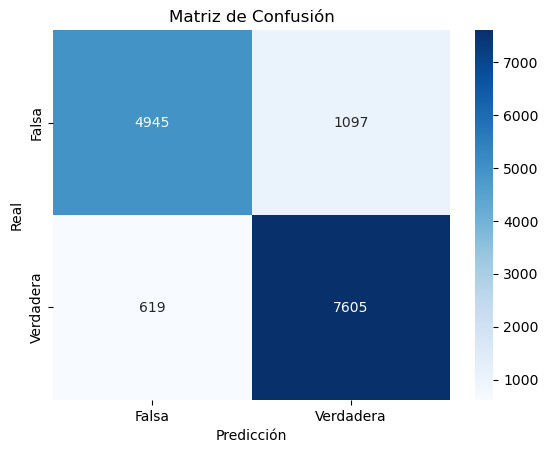

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Verdadera'], yticklabels=['Falsa', 'Verdadera'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [35]:
print("\nPesos de las características numéricas:")
for feature, coef in zip(X.columns[:6], modelo.coef_[0][:6]):
    print(f"{feature}: {coef:.4f}")


Pesos de las características numéricas:
Numero_Palabras_Titulo: 0.0052
Numero_Sospechosas_Titulo: -0.4020
Sentimiento_Titulo: -0.1131
Exclamaciones_Titulo: -0.3216
Numero_Palabras_Descripcion: -0.0013
Numero_Sospechosas_Descripcion: -0.1335


### Modelo de regresion logistica con SMOTE

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(sampling_strategy=0.9, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [37]:
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train_balanced, y_train_balanced)

/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
y_pred = modelo.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['Falsa', 'Verdadera']))

Precisión del modelo: 88.12%

Reporte completo:
              precision    recall  f1-score   support

       Falsa       0.90      0.81      0.85      6042
   Verdadera       0.87      0.93      0.90      8224

    accuracy                           0.88     14266
   macro avg       0.88      0.87      0.88     14266
weighted avg       0.88      0.88      0.88     14266



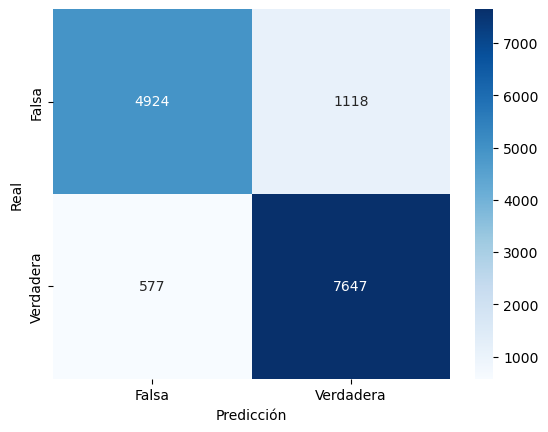

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Verdadera'], yticklabels=['Falsa', 'Verdadera'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [40]:
print("\nPesos de las características numéricas:")
for feature, coef in zip(X.columns[:6], modelo.coef_[0][:6]):
    print(f"{feature}: {coef:.4f}")


Pesos de las características numéricas:
Numero_Palabras_Titulo: 0.0087
Numero_Sospechosas_Titulo: -0.3345
Sentimiento_Titulo: -0.0321
Exclamaciones_Titulo: -0.2262
Numero_Palabras_Descripcion: -0.0012
Numero_Sospechosas_Descripcion: -0.0886


### Ya que se evidencia que este modelo tiene una precision un poco mayor el SMOTE no cambia mucho ahora probaremos ajustando los hiperparametros

In [41]:
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
    'penalty': ['l1', 'l2'],  
    'max_iter': [1000, 2000]  
}

In [42]:
modelo_base = LogisticRegression(solver='liblinear')  

In [43]:
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    cv=5,  
    scoring='f1_weighted',  
    n_jobs=-1,  
    verbose=1 
  )

In [44]:
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'max_iter': [1000, 2000], 'penalty': ['l1', 'l2']},
             scoring='f1_weighted', verbose=1)

In [45]:
print("\nMejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score en validación cruzada:", grid_search.best_score_)


Mejores hiperparámetros: {'C': 1.0, 'max_iter': 2000, 'penalty': 'l1'}
Mejor F1-score en validación cruzada: 0.8861190583281993


In [46]:
print("\nMejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score en validación cruzada:", grid_search.best_score_)

mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)
print(f"\nPrecisión del modelo: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['Falsa', 'Verdadera']))


Mejores hiperparámetros: {'C': 1.0, 'max_iter': 2000, 'penalty': 'l1'}
Mejor F1-score en validación cruzada: 0.8861190583281993

Precisión del modelo: 88.64%

Reporte completo:
              precision    recall  f1-score   support

       Falsa       0.91      0.82      0.86      6042
   Verdadera       0.87      0.94      0.90      8224

    accuracy                           0.89     14266
   macro avg       0.89      0.88      0.88     14266
weighted avg       0.89      0.89      0.89     14266



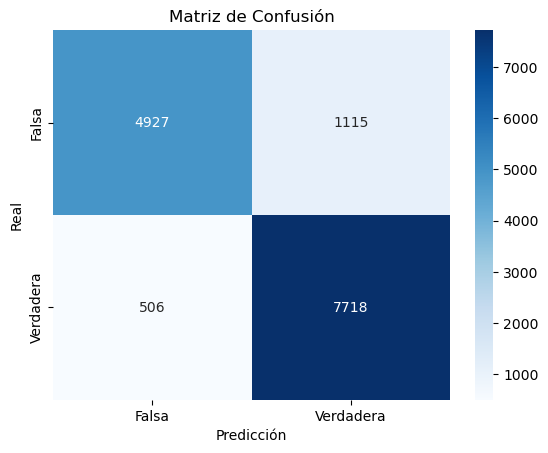

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Verdadera'], yticklabels=['Falsa', 'Verdadera'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Podemos concluir que este modelo con los hiperparametros es el que mayor cantidad de aciertos tiene.

- Verdaderos Negativos (TN) = 4904 (Falsa-Falsa)
- Falsos Positivos (FP) = 1095 (Falsa-Verdadera)
- Falsos Negativos (FN) = 539 (Verdadera-Falsa)
- Verdaderos Positivos (TP) = 7728 (Verdadera-Verdadera)

$$
\text{Exactitud} =\frac{TP+TN}{Total de ejemplos} =  \frac{7728 + 4904}{14266} = 0.8855
$$
La exactitud del 88.55% indica que el modelo clasifica correctamente el 88.55% de las 14,266 noticias en el conjunto de prueba
$$
\text{Presición} = \frac{TP}{TP + FP} = \frac{7728}{7728 + 1095} = 0.8761
$$
La precisión para la clase Verdadera es 87.61%, lo que significa que, de todas las veces que el modelo predijo una noticia como verdadera, el 87.61% realmente lo eran, con solo un 12.39% de falsos positivos (1,095 noticias verdaderas clasificadas erróneamente como falsas).
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{7728}{7728 + 539} = 0.9348
$$
El recall para Verdadera es 93.48%, lo que indica que el modelo detecta correctamente el 93.48% de las noticias verdaderas reales. Solo el 6.52% de las noticias verdaderas (539 de 8,267) se clasifican incorrectamente como falsas.



# Random forest - Jairo Fierro

In [48]:
import re
df["combined_text"] = df["Titulo"].fillna("") + " " + df["Descripcion"].fillna("")


df["combined_text"] = df["combined_text"].apply(lambda x: re.sub(r'\d+', '', x))  # Elimina números


tfidf_vectorizer = TfidfVectorizer(max_features=5000)

vectorizacion = tfidf_vectorizer.fit_transform(df["combined_text"].fillna(""))

In [49]:
palabras = tfidf_vectorizer.get_feature_names_out()
palabras

array(['abandona', 'abandonado', 'abandonar', ..., 'único', 'únicos',
       'útil'], dtype=object)

### Análisis desbalanceo de Clases

Lo primero es dividir los datos en el set de prueba y el set de entrenemiento, ya que la tecnica de SMOTE para corregir el desbalanceo de hace sobre los datos de entrenamiento.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(vectorizacion,df["Label"] , test_size=0.3, random_state=42)

Aplicar SMOTE para corregir el desbalanceo

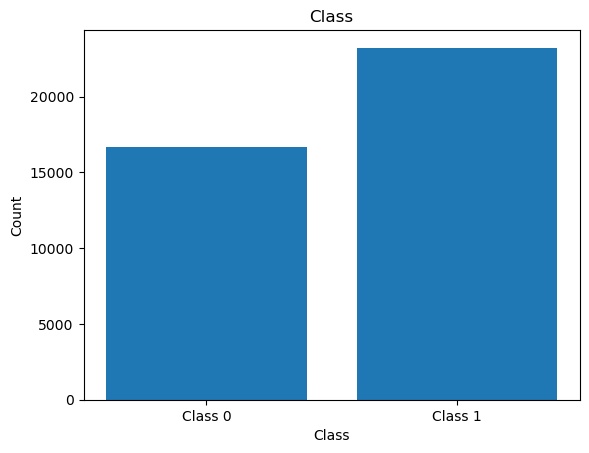

In [51]:
y=y_train
x=y_train

count_class = y.value_counts() # Count the occurrences of each class
count_class.index
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class')
plt.xticks(count_class.index, ['Class 1', 'Class 0'])
plt.show()

In [52]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

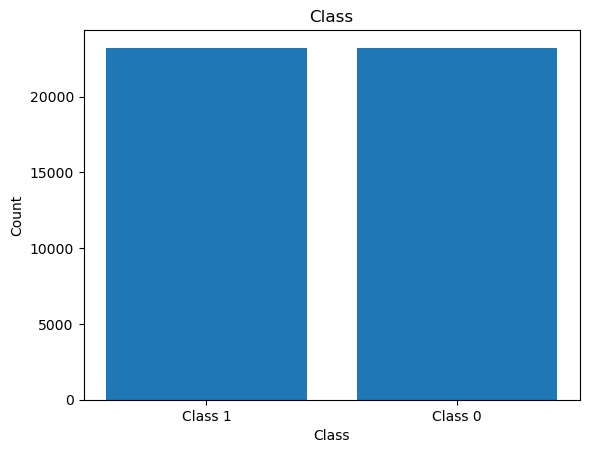

In [53]:
y=y_train_balanced
x=y_train_balanced

count_class = y.value_counts() # Count the occurrences of each class
count_class.index
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class')
plt.xticks(count_class.index, ['Class 1', 'Class 0'])
plt.show()

Modelo con SMOTE

In [54]:
# Initialize RandomForestClassifier
# Definir valores a probar


random_forest_with_somote = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_with_somote.fit(X_train_balanced, y_train_balanced)

y_prediccion = random_forest_with_somote.predict(X_test)

accuracy = accuracy_score(y_test, y_prediccion)
classification_rep = classification_report(y_test, y_prediccion)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86      7198
           1       0.87      0.94      0.91      9921

    accuracy                           0.89     17119
   macro avg       0.89      0.88      0.88     17119
weighted avg       0.89      0.89      0.88     17119



Modelo sin SMOTE

Probando con el parámetro class_weight con el valor balanced para que el modelo ajuste los pesos de la clase minoritaria y tenga más influencia en la clasificación.

In [55]:
random_forest_without_somote = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
random_forest_without_somote.fit(X_train, y_train)

y_prediccion = random_forest_without_somote.predict(X_test)

accuracy = accuracy_score(y_test, y_prediccion)
classification_rep = classification_report(y_test, y_prediccion)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7198
           1       0.89      0.96      0.93      9921

    accuracy                           0.91     17119
   macro avg       0.92      0.90      0.91     17119
weighted avg       0.91      0.91      0.91     17119



Se puede ver que el uso de la tecnica SMOTE en este caso no funciona. Los cambios no son significativos y no se ven mejoras en el modelo.

Evaluar overfitting de los modelos

In [56]:
# Evaluar en entrenamiento
train_accuracy = random_forest_with_somote.score(X_train, y_train)

# Evaluar en prueba
test_accuracy = random_forest_with_somote.score(X_test, y_test)

print(f"🔹 Accuracy en Train: {train_accuracy:.4f}")
print(f"🔹 Accuracy en Test: {test_accuracy:.4f}")

print(f"🔹 Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

🔹 Accuracy en Train: 0.9995
🔹 Accuracy en Test: 0.8859
🔹 Diferencia Train-Test: 0.1136


In [57]:
# Evaluar en entrenamiento
train_accuracy = random_forest_without_somote.score(X_train, y_train)

# Evaluar en prueba
test_accuracy = random_forest_without_somote.score(X_test, y_test)

print(f"🔹 Accuracy en Train: {train_accuracy:.4f}")
print(f"🔹 Accuracy en Test: {test_accuracy:.4f}")

print(f"🔹 Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

🔹 Accuracy en Train: 0.9995
🔹 Accuracy en Test: 0.9108
🔹 Diferencia Train-Test: 0.0887


Entrenar el modelo con hiperparametros para aumentar el rendimiento del modelo.

In [58]:
random_forest1 = RandomForestClassifier(n_estimators=100, min_samples_split=40,  max_leaf_nodes=500, class_weight="balanced", random_state=42)
random_forest1.fit(X_train, y_train)
#600
y_prediccion = random_forest1.predict(X_test)

accuracy = accuracy_score(y_test, y_prediccion)
classification_rep = classification_report(y_test, y_prediccion)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      7198
           1       0.90      0.96      0.93      9921

    accuracy                           0.91     17119
   macro avg       0.92      0.90      0.91     17119
weighted avg       0.92      0.91      0.91     17119



Evaluar overfitting del modelo

In [59]:
# Evaluar en entrenamiento
train_accuracy = random_forest1.score(X_train, y_train)

# Evaluar en prueba
test_accuracy = random_forest1.score(X_test, y_test)

print(f"🔹 Accuracy en Train: {train_accuracy:.4f}")
print(f"🔹 Accuracy en Test: {test_accuracy:.4f}")

print(f"🔹 Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

🔹 Accuracy en Train: 0.9426
🔹 Accuracy en Test: 0.9142
🔹 Diferencia Train-Test: 0.0285


Se puede ver que con el ajuste de hiperparámetros el overfitting del modelo se redujo.

Matriz de confusión

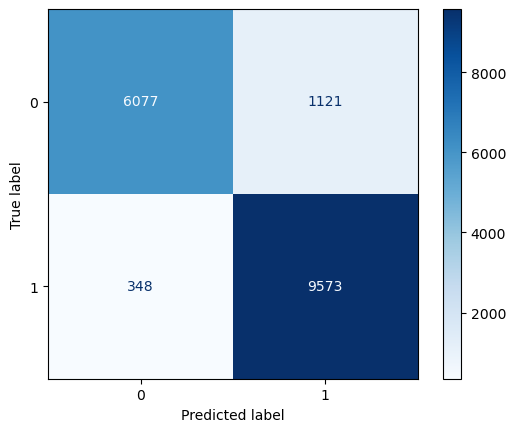

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_prediccion)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest1.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()


Análizando la matriz de confusión se puede decir que el modelo identificó erroneamente 1047 noticias verdaderas como noticias falsas. Por otro lado, 454 noticias falsas no fueron identificadas.

$$
\text{Exactitud} = \frac{6124 + 9494}{17119} = 0.9123
$$

Precisión 

$$
\text{Presición} = \frac{VP}{VP + FP} = \frac{9494}{9494 + 1047} = 0.90
$$

El modelo tiene una precisión del 90%, lo que significa que de todas las noticias clasificadas como falsas, el 90% realmente lo son. Esto indica un alto nivel de confianza en las predicciones positivas del modelo.

Recall

$$
\text{Recall} = \frac{VP}{VP + FN} = \frac{9494}{9494 + 454} = 0.95
$$

El modelo es capaz de identificar correctamente el 95% de las noticias falsas. Esto indica que solo el 5% de las noticias falsas no fueron detectadas, o sea, fueron clasificadas incorrectamente como verdaderas.

### Importancia de palabras

In [61]:
importancia = random_forest1.feature_importances_
importancia

array([3.31913026e-05, 1.36703412e-05, 1.22088419e-05, ...,
       5.48460891e-05, 0.00000000e+00, 2.92801962e-06])

In [62]:
palabras_importancia = pd.DataFrame({
    'Palabra': palabras,
    'Importancia': importancia
})
palabras_importancia

,Palabra,Importancia
0,abandona,0.000033
1,abandonado,0.000014
2,abandonar,0.000012
3,abandonó,0.000004
4,abascal,0.000828
...,...,...
4995,única,0.000067
4996,únicamente,0.000004
4997,único,0.000055
4998,únicos,0.000000


In [63]:
top_n = 30
top_words = palabras_importancia.sort_values(by='Importancia', ascending=False).head(top_n)
top_words

,Palabra,Importancia
1764,equo,0.068281
3464,per,0.039621
595,bng,0.036512
1593,eaj,0.033604
3554,podemos,0.033032
4839,vers,0.032251
4507,sánchez,0.031473
1177,cristina,0.026125
3145,narbona,0.025369
3546,pnv,0.021923


## Ahora haremos la entrega del modelo probandolo en el otro data frame

In [64]:
dataPrueba=pd.read_csv('Data/fake_news_test.csv', sep=';', encoding = 'utf-8')
print("Columnas en dataPrueba:", dataPrueba.columns.tolist())

Columnas en dataPrueba: ['ID', 'Titulo', 'Descripcion', 'Fecha']


In [65]:
print("\nValores nulos en Título:", dataPrueba['Titulo'].isna().sum())
print("Valores nulos en Descripción:", dataPrueba['Descripcion'].isna().sum())


Valores nulos en Título: 1
Valores nulos en Descripción: 0


In [66]:
dataPrueba['Titulo'] = dataPrueba['Titulo'].fillna('')
dataPrueba['Descripcion'] = dataPrueba['Descripcion'].fillna('')


In [67]:
# Preprocesamiento del texto
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens if word.isalnum()]
    tokens = [p.number_to_words(word) if word.isdigit() else word for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


# Extracción de características
def extract_text_features(text):
    if not isinstance(text, str):
        return pd.Series([0, 0, 0, 0])
    tokens = word_tokenize(text.lower())
    tokens_lematizados = [lemmatizer.lemmatize(token) for token in tokens]
    num_palabras = len(tokens)
    num_sospechosas = sum(1 for palabra in tokens_lematizados if palabra in palabras_sospechosas)
    sentimiento = analyzer.polarity_scores(text)['compound']
    num_exclamaciones = text.count('!') + text.count('¡')
    return pd.Series([num_palabras, num_sospechosas, sentimiento, num_exclamaciones])


In [68]:
dataPrueba['Título_procesado'] = dataPrueba['Titulo'].apply(preprocess_text)
dataPrueba['Descripción_procesado'] = dataPrueba['Descripcion'].apply(preprocess_text)

dataPrueba[['Numero_Palabras_Titulo', 'Numero_Sospechosas_Titulo', 'Sentimiento_Titulo', 'Exclamaciones_Titulo']] = dataPrueba['Titulo'].apply(extract_text_features)
dataPrueba[['Numero_Palabras_Descripcion', 'Numero_Sospechosas_Descripcion', 'Sentimiento_Descripcion', 'Exclamaciones_Descripcion']] = dataPrueba['Descripcion'].apply(extract_text_features)


In [69]:

tfidf = TfidfVectorizer(max_features=5000) 
X_tfidf = tfidf.fit_transform(dataPrueba['Título_procesado'] + ' ' + dataPrueba['Descripción_procesado']).toarray()
X_tfidf_df = pd.DataFrame(X_tfidf, columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])])

X_pred = pd.concat([dataPrueba[['Numero_Palabras_Titulo', 'Numero_Sospechosas_Titulo', 'Sentimiento_Titulo', 'Exclamaciones_Titulo',
                               'Numero_Palabras_Descripcion', 'Numero_Sospechosas_Descripcion', 'Sentimiento_Descripcion', 'Exclamaciones_Descripcion']],
                   X_tfidf_df], axis=1)

In [70]:
expected_features = 5000
if X_pred.shape[1] != expected_features:
    print(f"Advertencia: X_pred tiene {X_pred.shape[1]} características, pero se esperan {expected_features}. Ajustando...")
    if X_pred.shape[1] < expected_features:
        missing_cols = expected_features - X_pred.shape[1]
        dummy_cols = pd.DataFrame(0, index=X_pred.index, columns=[f'tfidf_dummy_{i}' for i in range(missing_cols)])
        X_pred = pd.concat([X_pred, dummy_cols], axis=1)
    elif X_pred.shape[1] > expected_features:
        X_pred = X_pred.iloc[:, :expected_features]


Advertencia: X_pred tiene 5008 características, pero se esperan 5000. Ajustando...


In [71]:
X_pred = X_pred.astype(float)


In [72]:
print("Valores nulos en X_pred:", X_pred.isna().sum().sum())
if X_pred.isna().sum().sum() > 0:
    print("Rellenando nulos en X_pred con 0")
    X_pred = X_pred.fillna(0)

Valores nulos en X_pred: 0


In [73]:
try:
    dataPrueba["prediccion"] = random_forest1.predict(X_pred)
except NameError:
    raise NameError("El modelo 'random_forest1' no está definido. Asegúrate de haberlo entrenado y cargado.")
except ValueError as e:
    raise ValueError(f"Error al predecir: {str(e)}. Verifica que las características coincidan con el entrenamiento.")
dataPrueba.to_csv("fake_news_test2.csv", index=False)

print("Archivo actualizado con las predicciones guardado en fake_news_test2.csv. se guarda por fuera de la parte de data")


Archivo actualizado con las predicciones guardado en fake_news_test2.csv. se guarda por fuera de la parte de data


/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [74]:
print("\nPrimeras filas de dataPrueba con predicciones:")
dataPrueba.head()


Primeras filas de dataPrueba con predicciones:


,ID,Titulo,Descripcion,Fecha,Título_procesado,Descripción_procesado,Numero_Palabras_Titulo,Numero_Sospechosas_Titulo,Sentimiento_Titulo,Exclamaciones_Titulo,Numero_Palabras_Descripcion,Numero_Sospechosas_Descripcion,Sentimiento_Descripcion,Exclamaciones_Descripcion,prediccion
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018,mesa congreso censura encuentro internacional ...,portavoces ciudadanos pnv upn psoe unidos pp e...,14.0,0.0,0.0,0.0,22.0,0.0,0.0000,0.0,1
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023,brecha digital dificulta acceso ayudas persona...,primera vez ciudadanos vulnerables topan obsta...,24.0,0.0,0.0,0.0,38.0,0.0,-0.2960,0.0,1
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019,pp apremia equo presentar propuesta gobierno c...,partido morado reprocha socialistas paralizado...,16.0,0.0,0.0,0.0,36.0,0.0,-0.5267,0.0,0
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020,soberano garante democracia rey corrupto apart...,renuncia felipe vi herencia procedente multimi...,13.0,0.0,0.0,0.0,78.0,0.0,0.3400,0.0,1
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021,gobierno aprobara martes detraer beneficios ex...,ejecutivo tambien prorrogara suspension impues...,22.0,0.0,0.0,0.0,62.0,0.0,0.0000,0.0,1


In [75]:
if 'Label' in dataPrueba.columns:
    y_true = dataPrueba['Label']
    y_pred = dataPrueba['prediccion']
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, target_names=['Falsa', 'Verdadera']))
    print("\nF1-score para 'Falsa' (Label = 0):", f1_score(y_true, y_pred, pos_label=0))
    print("F1-score para 'Verdadera' (Label = 1):", f1_score(y_true, y_pred, pos_label=1))

## SVM - Felipe Jaimes

### Vectorización

Aquí se convierte el texto en vectores numéricos, capturando la importancia de cada palabra en el documento

Además se concatenan las columnas Titulo y Descripcion para aplicar TF-IDF sobre el texto completo.

In [76]:
# Vectorización TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Limitar a 1000 términos más frecuentes
X_tfidf = tfidf.fit_transform(df['Titulo'] + ' ' + df['Descripcion']).toarray()
X_tfidf_df = pd.DataFrame(X_tfidf, columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])])

### División datos entrenamiento y prueba

Se divide el conjunto de datos en entrenamiento (75%) y prueba (25%), se usa un kernel lineal (kernel='linear') porque es adecuado para problemas de texto y es más interpretable.

In [77]:
from sklearn.svm import LinearSVC
# Dividir los datos en entrenamiento y prueba
X = X_tfidf_df 
y = df['Label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Metricas de modelo sin SMOTE

In [78]:
modelo_sin_smote = LinearSVC(random_state=42, dual=False)
modelo_sin_smote.fit(X_train, y_train)
y_pred_sin_smote = modelo_sin_smote.predict(X_test)
print("Sin SMOTE:")
print(f"Precisión: {accuracy_score(y_test, y_pred_sin_smote) * 100:.2f}%")
print(classification_report(y_test, y_pred_sin_smote, target_names=['Falsa', 'Verdadera']))

Sin SMOTE:
Precisión: 88.66%
              precision    recall  f1-score   support

       Falsa       0.92      0.80      0.86      6042
   Verdadera       0.87      0.95      0.91      8224

    accuracy                           0.89     14266
   macro avg       0.89      0.87      0.88     14266
weighted avg       0.89      0.89      0.89     14266



### Crear un pipeline con SMOTE y LinearSVC

In [79]:
pipeline = ImbPipeline([
    ("vectorizer", TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),  # Aplicar SMOTE
    ('svm', LinearSVC(random_state=42, dual=False))  # Modelo LinearSVC
])

### Validación Cruzada k-Fold

La validación cruzada (k-Fold) divide los datos en k=5 subconjuntos y evalúa el modelo en cada uno ,proporcionando una estimación más robusta del rendimiento del modelo.

In [80]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", scores)
print("Precisión promedio:", scores.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 265, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 1057, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 106, in fit_resample
    X, y, binarize_y = self._check_X_y(X, y)
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 161, in _check_X_y
    X, y = self._validate_data(X, y, reset=True, accept_sparse=accept_sparse)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1164, in check_X_y
    check_consistent_length(X, y)
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 407, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [1000, 34236]

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 265, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/pipeline.py", line 1057, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 106, in fit_resample
    X, y, binarize_y = self._check_X_y(X, y)
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/imblearn/base.py", line 161, in _check_X_y
    X, y = self._validate_data(X, y, reset=True, accept_sparse=accept_sparse)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1164, in check_X_y
    check_consistent_length(X, y)
  File "/Users/marcosrodrigo/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 407, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [1000, 34237]


### Búsqueda de hiperparámetros con el pipeline

GridSearchCV realiza una búsqueda exhaustiva sobre una grilla de hiperparámetros para encontrar los mejores valores.

El modelo se evalúa con validación cruzada (cv=5) y se selecciona la combinación de hiperparámetros que maximiza la precisión.

In [81]:
param_grid = {
    'svm__C': [0.1, 1.0, 10.0],# Valores de C para LinearSVC
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nMejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'svm__C': 1.0}


C=1.0 es el mejor, esto nos indica que el modelo no necesita ser muy flexible (C=10.0) ni muy rígido (C=0.1) para lograr un buen rendimiento.

### Evaluar el modelo en el conjunto de prueba

In [82]:
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

### Metricas

GridSearchCV realiza una búsqueda exhaustiva sobre una grilla de hiperparámetros para encontrar los mejores valores.

El modelo se evalúa con validación cruzada (cv=5) y se selecciona la combinación de hiperparámetros que maximiza la precisión.

In [83]:
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo SVM con SMOTE: {precision * 100:.2f}%")
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['Falsa', 'Verdadera']))


Precisión del modelo SVM con SMOTE: 88.15%

Reporte completo:
              precision    recall  f1-score   support

       Falsa       0.89      0.82      0.85      5999
   Verdadera       0.88      0.93      0.90      8267

    accuracy                           0.88     14266
   macro avg       0.88      0.87      0.88     14266
weighted avg       0.88      0.88      0.88     14266



#### Matriz de confusión

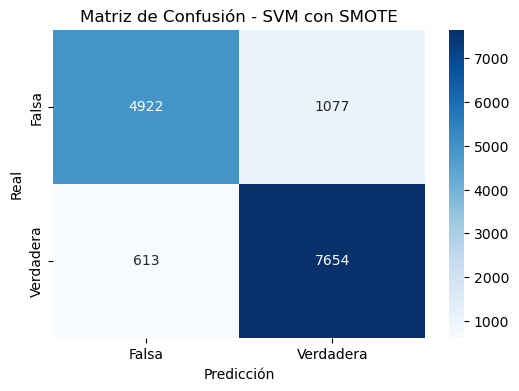

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Verdadera'], yticklabels=['Falsa', 'Verdadera'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM con SMOTE')
plt.show()

#### Analisis overfitting

In [85]:
# Evaluar en entrenamiento
train_accuracy = mejor_modelo.score(X_train, y_train)

# Evaluar en prueba
test_accuracy = mejor_modelo.score(X_test, y_test)

print(f"🔹 Accuracy en Train: {train_accuracy:.4f}")
print(f"🔹 Accuracy en Test: {test_accuracy:.4f}")

print(f"🔹 Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

🔹 Accuracy en Train: 0.8907
🔹 Accuracy en Test: 0.8815
🔹 Diferencia Train-Test: 0.0092


La diferencia es pequeña, lo que indica que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

### Exactitud

$$
\text{Exactitud} = \frac{VP+VN}{VP+VN+FP+FN} = \frac{7654+4922}{7654+4922+1077+613} = 0.881
$$

El modelo tiene una exactitud del 88.15%, lo que significa que acierta en el 88.15% de las predicciones.

### Presición

$$
\text{Presición} = \frac{VP}{VP + FP} = \frac{7654}{7654+1077} = 0.876
$$

El modelo tiene una precisión del 87.68%, lo que significa que de todas las noticias clasificadas como verdaderas, el 87.68% realmente lo son.

### Recall

$$
\text{Recall} = \frac{VP}{VP + FN} = \frac{7654}{7654 + 613} = 0.925
$$

El modelo tiene un recall del 92.58%, lo que significa que es capaz de identificar correctamente el 92.58% de las noticias verdaderas. Solo el 7.42% de las noticias verdaderas no fueron detectadas (clasificadas incorrectamente como falsas).

# Pipeline del modelo elegido

In [82]:

from joblib import dump, load
from sklearn.pipeline import Pipeline

In [87]:
X_train, X_test, y_train, y_test = train_test_split(vectorizacion,df["Label"] , test_size=0.3, random_state=42)

In [88]:
pipelineSelectedModel = Pipeline(
    [
        ('vector', TfidfVectorizer(max_features=5000)),
        ('model', RandomForestClassifier(n_estimators=100, min_samples_split=40,  max_leaf_nodes=500, class_weight="balanced", random_state=42))
    ]
)

In [89]:
vector = tfidf_vectorizer.fit_transform(df["combined_text"])

In [90]:
pipelineSelectedModel.fit(df["combined_text"], df["Label"])

Pipeline(steps=[('vector', TfidfVectorizer(max_features=5000)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_leaf_nodes=500,
                                        min_samples_split=40,
                                        random_state=42))])

 # Persistencia del modelo

In [83]:

filename = 'api/modelNuevo.joblib'
dump(pipeline, filename)

['api/modelNuevo.joblib']

In [ ]:
pipeline = ImblearnPipeline([
    ("vectorizer", TfidfVectorizer()),
    ("smote", SMOTE(random_state=42)),
    ("svm", LinearSVC(dual=False, random_state=42))
])
print("Nuevo Pipeline creado con TfidfVectorizer, SMOTE y LinearSVC")

In [92]:
filename = 'api/modelPipelineSelected.joblib'
dump(pipelineSelectedModel, filename)

['api/modelPipelineSelected.joblib']